## Задание 2
**Пояснение к формату:** login — логин асессора; uid — id асессора (user id); docid — id оцениваемого документа (document id); jud — оценка асессора (judgement); cjud — правильная оценка (correct judgement); разделитель — табуляция \t.

Оценки могут принимать значение [0, 1], т.е. задание, которое сделали асессоры, имеет бинарную шкалу.

Используя данные об оценках, установите, какие асессоры хуже всего справились с заданием. На какие показатели вы ориентировались и какие метрики вы использовали для ответа на этот вопрос? Можно ли предложить какие-то новые метрики для подсчета качества асессоров с учетом природы оценок у этого бинарного задания?

Опишите подробно все этапы вашего решения.

**Для получения ответа** использовался метод оценки точности прогнозирования. Для начала была расчитана абсолютная ошибка, т.е. общее количество неправильных ответов и далее их поделенна на сумму верных ответов. В результате я вывел ТОП-5 асессоров сделавших максимальное количество ошибок, саммый яркий пример был - асессор совершил 236 ошибок из 236 возможных.
Так же была расчитана MSE (

**Шаг 1. Подготавливаем и проверяем данные**

In [2]:
#загрузка стандартных библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('data_task3.csv', sep='\t')
df.head()

,login,uid,docid,jud,cjud
0,assessor158,158,0,0,0
1,assessor238,238,0,0,0
2,assessor488,488,0,0,0
3,assessor136,136,0,0,0
4,assessor300,300,0,0,0


In [3]:
#вся таблица заполнена, пустых значений нет
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   login   250000 non-null  object
 1   uid     250000 non-null  int64 
 2   docid   250000 non-null  int64 
 3   jud     250000 non-null  int64 
 4   cjud    250000 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 9.5+ MB


In [4]:
#проверка и устранение дубликатов
df[df.duplicated(keep=False)]
df = df.drop_duplicates()

In [5]:
#общая статистика
df.describe()

,uid,docid,jud,cjud
count,249999.000000,249999.000000,249999.000000,249999.000000
mean,299.325645,24999.533682,0.238121,0.119920
std,173.132218,14433.804637,0.425934,0.324869
min,0.000000,0.000000,0.000000,0.000000
25%,150.000000,12499.500000,0.000000,0.000000
50%,299.000000,25000.000000,0.000000,0.000000
75%,449.000000,37499.500000,0.000000,0.000000
max,599.000000,49999.000000,1.000000,1.000000


**Шаг 2. Какие асессоры справились хуже всего.**

##### Для ответа на этот вопрос попробую обратиться к методу оценки точности прогнозирования, где под прогнозированием будут выступать ответы асессоров (jud), а под фактическими данными - правильные ответы (cjud).
##### В таком случае формула будет следующая:  ABS(jud-cjud) / cjud

In [6]:
#подсчет общего кол-ва неправильных ответов
df['fa']=abs((df['jud']-df['cjud'])).astype(int)
df['mistake']=(df['jud']-df['cjud']).astype(int)
df.head(3)

,login,uid,docid,jud,cjud,fa,mistake
0,assessor158,158,0,0,0,0,0
1,assessor238,238,0,0,0,0,0
2,assessor488,488,0,0,0,0,0


In [7]:
#сводная таблица для группировки расчитанных значений
pivot =pd.pivot_table(df,values=['jud','fa','cjud'], index = 'uid', aggfunc='sum')
pivot['sfa'] = pivot.fa / pivot.cjud
pivot.sort_values('sfa', ascending = False).head() #сортировка для выявления наихудших позиций

,cjud,fa,jud,sfa
uid,,,,
118,39,205,214,5.256410
56,46,236,236,5.130435
3,49,230,231,4.693878
390,47,214,223,4.553191
234,14,51,53,3.642857


** **
### Ответ:
**Показаны топ-5 асессоров**, которые допустили максимальное количество ошибок.
Например, асессор №56 совершил 236 ошибок из 236 возможных, поставив везде 1, где должен быть 0 и 0 где должен быть один. Но лидер данного анти-рейтинга явлется асессор№118, не смотря на то что, данный асессор имеет меньше неправильных ответ, сумма его ошибки больше.
** **
#### 
**Шаг 3.** Еще немного посмотрим данные.
Проверим, правильно ли работает точность (прогнозирования) ответов построенная выше.

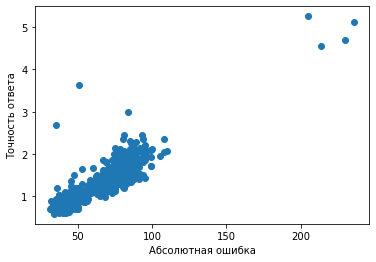

In [8]:
y = pivot['sfa']
x = pivot['fa']
plt.ylabel('Точность ответа')
plt.xlabel('Абсолютная ошибка')
plt.scatter(x,y)

Из графика можно сделать вывод что, чем выше абсолютная ошибка, тем дальше точность стремится от нуля, а это значит всё работает корректно. Так же в верхнем правом углу хорошо видно асессоров которые попали в анти-рейтинг в таблице выше.

In [9]:
#Еще раз посмотрим статистическую таблицу
df.describe()

,uid,docid,jud,cjud,fa,mistake
count,249999.000000,249999.000000,249999.000000,249999.000000,249999.000000,249999.00000
mean,299.325645,24999.533682,0.238121,0.119920,0.158713,0.11820
std,173.132218,14433.804637,0.425934,0.324869,0.365409,0.38045
min,0.000000,0.000000,0.000000,0.000000,0.000000,-1.00000
25%,150.000000,12499.500000,0.000000,0.000000,0.000000,0.00000
50%,299.000000,25000.000000,0.000000,0.000000,0.000000,0.00000
75%,449.000000,37499.500000,0.000000,0.000000,0.000000,0.00000
max,599.000000,49999.000000,1.000000,1.000000,1.000000,1.00000


Хотел бы повторно обратиться к общей таблице. Тут так же можно сделать небольшие выводы, например, что среднее по jud и по cjud говорит о том, что асессоры в 2 раза чаще ставят 1 чем правильных ответов на самом деле(0,238 против 0,119). Так же это говорит о том что их 100 ответов, только 11 верные.

In [10]:
from sklearn.metrics import mean_squared_error
Y_true = df['jud']
Y_pred = df['cjud']
mean_squared_error(Y_true,Y_pred)

0.1587126348505394

Применяя расчет средней квадратичной ошибки, можно сделать вывод, что **средний асессор делает около 15% ошибок**.

Text(0, 0.5, 'Среднее кол-во ошибок')

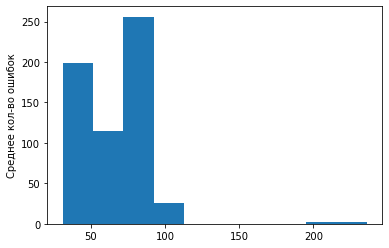

In [11]:
pivot['fa'].plot(kind='hist')
plt.ylabel('Среднее кол-во ошибок')